# In-depth analysis: predictive modeling using Deep Learning

### 3.2  Deep Neural Networks

Importing relevant packages:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Importing Keras packages:

In [3]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

Using TensorFlow backend.


In [4]:
X_train = pd.read_csv('../Data/processed/x_train.csv')
y_train = pd.read_csv('../Data/processed/y_train.csv')
X_test = pd.read_csv('../Data/processed/x_test.csv')
y_test = pd.read_csv('../Data/processed/y_test.csv')

Multilayer Perceptrons or MLPs, the most classical type of neural network and suitable for classification and regression problems, is used in this application. In MLPs applications, data is usually provided by tabular format 
(CVS file and spreadsheet) and feeds the input layer. One or more hidden layers provide levels of abstraction and predictions are mande on the output layer. In this case, predictions correspond to the listing prices.

<div class="alert alert-block alert-info">
Feel free to check Keras documentation <a href="https://keras.io/getting-started/sequential-model-guide/">here</a>   for more details about the packages imported in this section and the methods mentioned below.

Once imported **Sequential**, **Dense** and **Activation** we create the Sequential model followed by the addition of layers to the constructor via .add() method. 

The first layer has as nodes as dimensions containing the feature vectors. This information is extracted as the number of columns of the training set.
</div>

Definition of the model and input layer:

In [5]:
model = Sequential()

model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


Configuration if **hidden layers** with a **normal** initializer as **RELU** activation function:

In [6]:
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

Configuration of the **output layer** as one node and a **linear** activation function:

In [7]:
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

Next, we configure the learning process, which receives an optimizer, a loss function and a list of metrics. 

In [8]:
model.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mean_absolute_error', 'mae'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               7168      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 106,241
Trainable params: 106,241
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-block alert-info">

<b> Difference between batch size and epochs </b>

The batch size is a number of samples (single rows of data) processed before the model is updated. This hyperparameter is set as an integer between one and the number of samples in the training dataset. For a Gradient Descent algorithm, the selection of one batch is called Stochastic Gradient Descent; a number upper than 1 and less than the size of training set represents the Mini-Batch Gradient Descent configuration (popular choices are 32, 64 and 128) and the use of all the training dataset is distinguished as Batch Gradient Descent. In this exercise, we use a Mini-Batch configuration with a batch size of 32.

The number of epochs is the number of complete passes through the training dataset and it is set to an integer between one and infinity. You can find the minimum epochs necessary to avoid under or overfitting your model choosing a high value and evaluating the performance of the model in every iteration, as below:

</div>

Checkpoint callback:

In [10]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [11]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 6173 samples, validate on 1544 samples
Epoch 1/100
6173/6173 [==============================] - 1s 220us/step - loss: 65.2002 - mean_absolute_error: 65.2002 - mae: 65.2002 - val_loss: 51.9798 - val_mean_absolute_error: 51.9798 - val_mae: 51.9798

Epoch 00001: val_loss improved from inf to 51.97981, saving model to Weights-001--51.97981.hdf5
Epoch 2/100
6173/6173 [==============================] - 1s 127us/step - loss: 53.0563 - mean_absolute_error: 53.0563 - mae: 53.0563 - val_loss: 54.2883 - val_mean_absolute_error: 54.2883 - val_mae: 54.2883

Epoch 00002: val_loss did not improve from 51.97981
Epoch 3/100
6173/6173 [==============================] - 1s 166us/step - loss: 51.1191 - mean_absolute_error: 51.1191 - mae: 51.1191 - val_loss: 49.4120 - val_mean_absolute_error: 49.4120 - val_mae: 49.4120

Epoch 00003: val_loss improved from 51.97981 to 49.41201, saving model to Weights-003--49.41201.hdf5
Epoch 4/100
6173/6173 [========


Epoch 00029: val_loss did not improve from 47.49160
Epoch 30/100
6173/6173 [==============================] - 1s 170us/step - loss: 47.3472 - mean_absolute_error: 47.3472 - mae: 47.3472 - val_loss: 49.7196 - val_mean_absolute_error: 49.7196 - val_mae: 49.7196

Epoch 00030: val_loss did not improve from 47.49160
Epoch 31/100
6173/6173 [==============================] - 1s 145us/step - loss: 47.2500 - mean_absolute_error: 47.2500 - mae: 47.2500 - val_loss: 47.5671 - val_mean_absolute_error: 47.5671 - val_mae: 47.5671

Epoch 00031: val_loss did not improve from 47.49160
Epoch 32/100
6173/6173 [==============================] - 1s 142us/step - loss: 47.1780 - mean_absolute_error: 47.1780 - mae: 47.1780 - val_loss: 47.1230 - val_mean_absolute_error: 47.1230 - val_mae: 47.1230

Epoch 00032: val_loss improved from 47.49160 to 47.12302, saving model to Weights-032--47.12302.hdf5
Epoch 33/100
6173/6173 [==============================] - 1s 178us/step - loss: 47.0211 - mean_absolute_error: 47.0

6173/6173 [==============================] - 1s 144us/step - loss: 44.8122 - mean_absolute_error: 44.8122 - mae: 44.8122 - val_loss: 46.6220 - val_mean_absolute_error: 46.6220 - val_mae: 46.6220

Epoch 00060: val_loss did not improve from 46.49604
Epoch 61/100
6173/6173 [==============================] - 1s 171us/step - loss: 44.7054 - mean_absolute_error: 44.7054 - mae: 44.7054 - val_loss: 46.8982 - val_mean_absolute_error: 46.8982 - val_mae: 46.8982

Epoch 00061: val_loss did not improve from 46.49604
Epoch 62/100
6173/6173 [==============================] - 1s 140us/step - loss: 44.6063 - mean_absolute_error: 44.6063 - mae: 44.6063 - val_loss: 47.7940 - val_mean_absolute_error: 47.7940 - val_mae: 47.7940

Epoch 00062: val_loss did not improve from 46.49604
Epoch 63/100
6173/6173 [==============================] - 1s 174us/step - loss: 44.4063 - mean_absolute_error: 44.4063 - mae: 44.4063 - val_loss: 48.3244 - val_mean_absolute_error: 48.3245 - val_mae: 48.3245

Epoch 00063: val_loss

6173/6173 [==============================] - 1s 177us/step - loss: 42.9172 - mean_absolute_error: 42.9172 - mae: 42.9172 - val_loss: 47.6387 - val_mean_absolute_error: 47.6387 - val_mae: 47.6387

Epoch 00091: val_loss did not improve from 46.49604
Epoch 92/100
6173/6173 [==============================] - 1s 150us/step - loss: 42.8276 - mean_absolute_error: 42.8276 - mae: 42.8276 - val_loss: 46.8733 - val_mean_absolute_error: 46.8733 - val_mae: 46.8733

Epoch 00092: val_loss did not improve from 46.49604
Epoch 93/100
6173/6173 [==============================] - 1s 174us/step - loss: 42.4182 - mean_absolute_error: 42.4182 - mae: 42.4182 - val_loss: 47.9316 - val_mean_absolute_error: 47.9316 - val_mae: 47.9316

Epoch 00093: val_loss did not improve from 46.49604
Epoch 94/100
6173/6173 [==============================] - 1s 141us/step - loss: 42.6036 - mean_absolute_error: 42.6036 - mae: 42.6036 - val_loss: 48.0987 - val_mean_absolute_error: 48.0987 - val_mae: 48.0987

Epoch 00094: val_loss

In [12]:
predictions = model.predict(X_test)

In [13]:
MAE = mean_absolute_error(y_test , predictions)
print('Deep Learning Network 2 hidden layers validation MAE = ', MAE)

Deep Learning Network 2 hidden layers validation MAE =  47.1783486460157


In [14]:
diff = y_test.unstack() - predictions.reshape(-1)

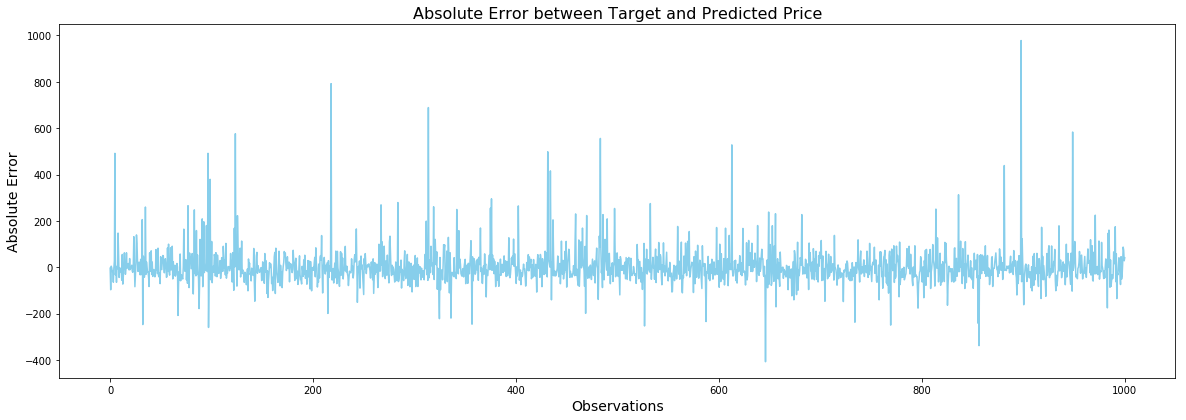

In [15]:
xh = np.linspace(0, 1000, len(y_test))

_ = plt.figure(figsize=(20, 6.5))
_ = sns.lineplot(x=xh, y=diff, color='skyblue')
_ = plt.xlabel('Observations', size=14)
_ = plt.ylabel('Absolute Error', size=14)
_ = plt.title('Absolute Error between Target and Predicted Price', size=16)

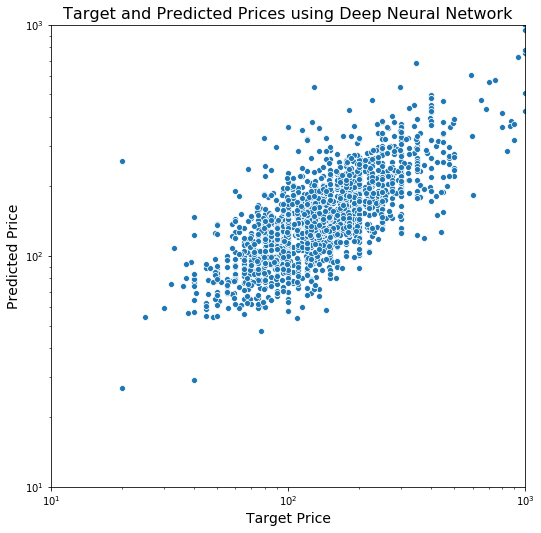

In [16]:
_ = plt.figure(figsize=(8.5, 8.5))
_ = plt.xscale('log')
_ = plt.yscale('log')
_ = sns.scatterplot(x=y_test['# target'], y=predictions.reshape(-1))
_ = plt.xlabel('Target Price', size=14)
_ = plt.ylabel('Predicted Price', size=14)
_ = plt.title('Target and Predicted Prices using Deep Neural Network', size=16)
_ = plt.xlim(10, 1000)
_ = plt.ylim(10, 1000)

###  KFold Cross Validation

Implementation of a 3-fold cross validation, inserting the model on the function `deep_learning_model` and applying a concatenation of `X_train` and `X_test` as `X` and `y_train` and `y_test` as `y`.

In [17]:
X = pd.concat([X_train, X_test])
X.head()

,# accommodates,bathrooms,bedrooms,host_response_rate_float,extra_people_float,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count_entire_homes,...,property_type_encode_26,property_type_encode_27,property_type_encode_28,property_type_encode_29,property_type_encode_30,bed_type_encode_0,bed_type_encode_1,bed_type_encode_2,bed_type_encode_3,bed_type_encode_4
0,0.2500,0.2500,0.333333,1.0,0.089286,0.000000,0.000000,0.077778,0.019178,0.013889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.1875,0.1250,0.166667,1.0,0.000000,0.100000,0.400000,0.500000,0.123288,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0625,0.1250,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.1875,0.1250,0.166667,1.0,0.000000,0.133333,0.066667,0.111111,0.273973,0.013889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.1875,0.3125,0.166667,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
y = pd.concat([y_train, y_test])

In [19]:
def deep_learning_function():
    model = Sequential()

    model.add(Dense(128, kernel_initializer='normal', input_dim = X.shape[1], activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    model.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mean_absolute_error', 'mae'])
    
    return model

Evaluation of the baseline model using 3-fold cross validation:

In [20]:
estimator = KerasRegressor(build_fn=deep_learning_function, epochs=20, batch_size=5, verbose=1)
kfold = KFold(n_splits=3)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/20
6431/6431 [==============================] - 5s 825us/step - loss: 54.9033 - mean_absolute_error: 54.9033 - mae: 54.9033
Epoch 2/20
6431/6431 [==============================] - 5s 834us/step - loss: 50.4641 - mean_absolute_error: 50.4641 - mae: 50.4641
Epoch 3/20
6431/6431 [==============================] - 6s 883us/step - loss: 49.9033 - mean_absolute_error: 49.9033 - mae: 49.9033
Epoch 4/20
6431/6431 [==============================] - 5s 840us/step - loss: 49.8099 - mean_absolute_error: 49.8099 - mae: 49.8099
Epoch 5/20
6431/6431 [==============================] - 6s 881us/step - loss: 49.5746 - mean_absolute_error: 49.5747 - mae: 49.5747
Epoch 6/20
6431/6431 [==============================] - 6s 890us/step - loss: 48.9105 - mean_absolute_error: 48.9105 - mae: 48.9105
Epoch 7/20
6431/6431 [==============================] - 5s 853us/step - loss: 49.2176 - mean_absolute_error: 49.2177 - mae: 49.2177
Epoch 8/20
6431/6431 [==============================] - 6s 891us/step - loss